## Random Forest Regression

Predicted salary for level 6.5: 180000.0


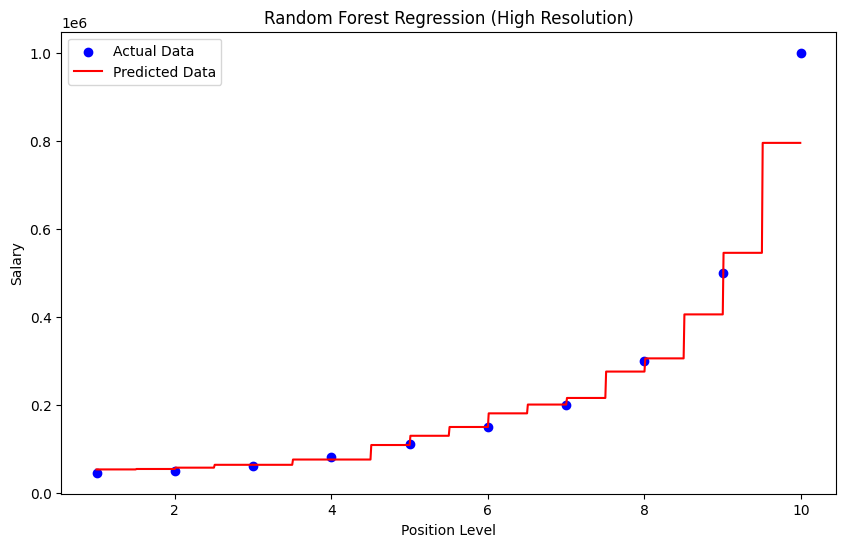

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../datasets/position-salaries.csv')

# Extract features and target variable
X = data.iloc[:, 1:2].values  # Feature: Level
y = data.iloc[:, 2].values  # Target: Salary

# Apply random forest regression
from sklearn.ensemble import RandomForestRegressor

# Create and fit the model
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X, y)

# Making predictions
y_pred = rf_regressor.predict(X)

# Predict for a specific value
predicted_salary = rf_regressor.predict([[6.5]])
print(f"Predicted salary for level 6.5: {predicted_salary[0]}")


# Visualizing with a higher resolution
X_grid = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, rf_regressor.predict(X_grid), color='red', label='Predicted Data')
plt.title('Random Forest Regression (High Resolution)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
